# Checking GPU


In [1]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


# Installing YOLO


In [ ]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


Mouting to drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading labelled data from Roboflow


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="IW30vh6bVwF0UjmdKgzD")
project = rf.workspace("yolo-onuf0").project("fer-s4bk3")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.6, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to facial-expression-1 in yolov8:: 100%|██████████| 2878/2878 [00:00<00:00, 3200.22it/s]


# Model Training


In [4]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/mood_detection/facial-expression-1/data.yaml epochs=30 imgsz=600

100% 21.5M/21.5M [00:00<00:00, 151MB/s] 
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/mood_detection/facial-expression-1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_tx

# Model Evaluation


In [1]:
from ultralytics import YOLO
from IPython.display import display, Image

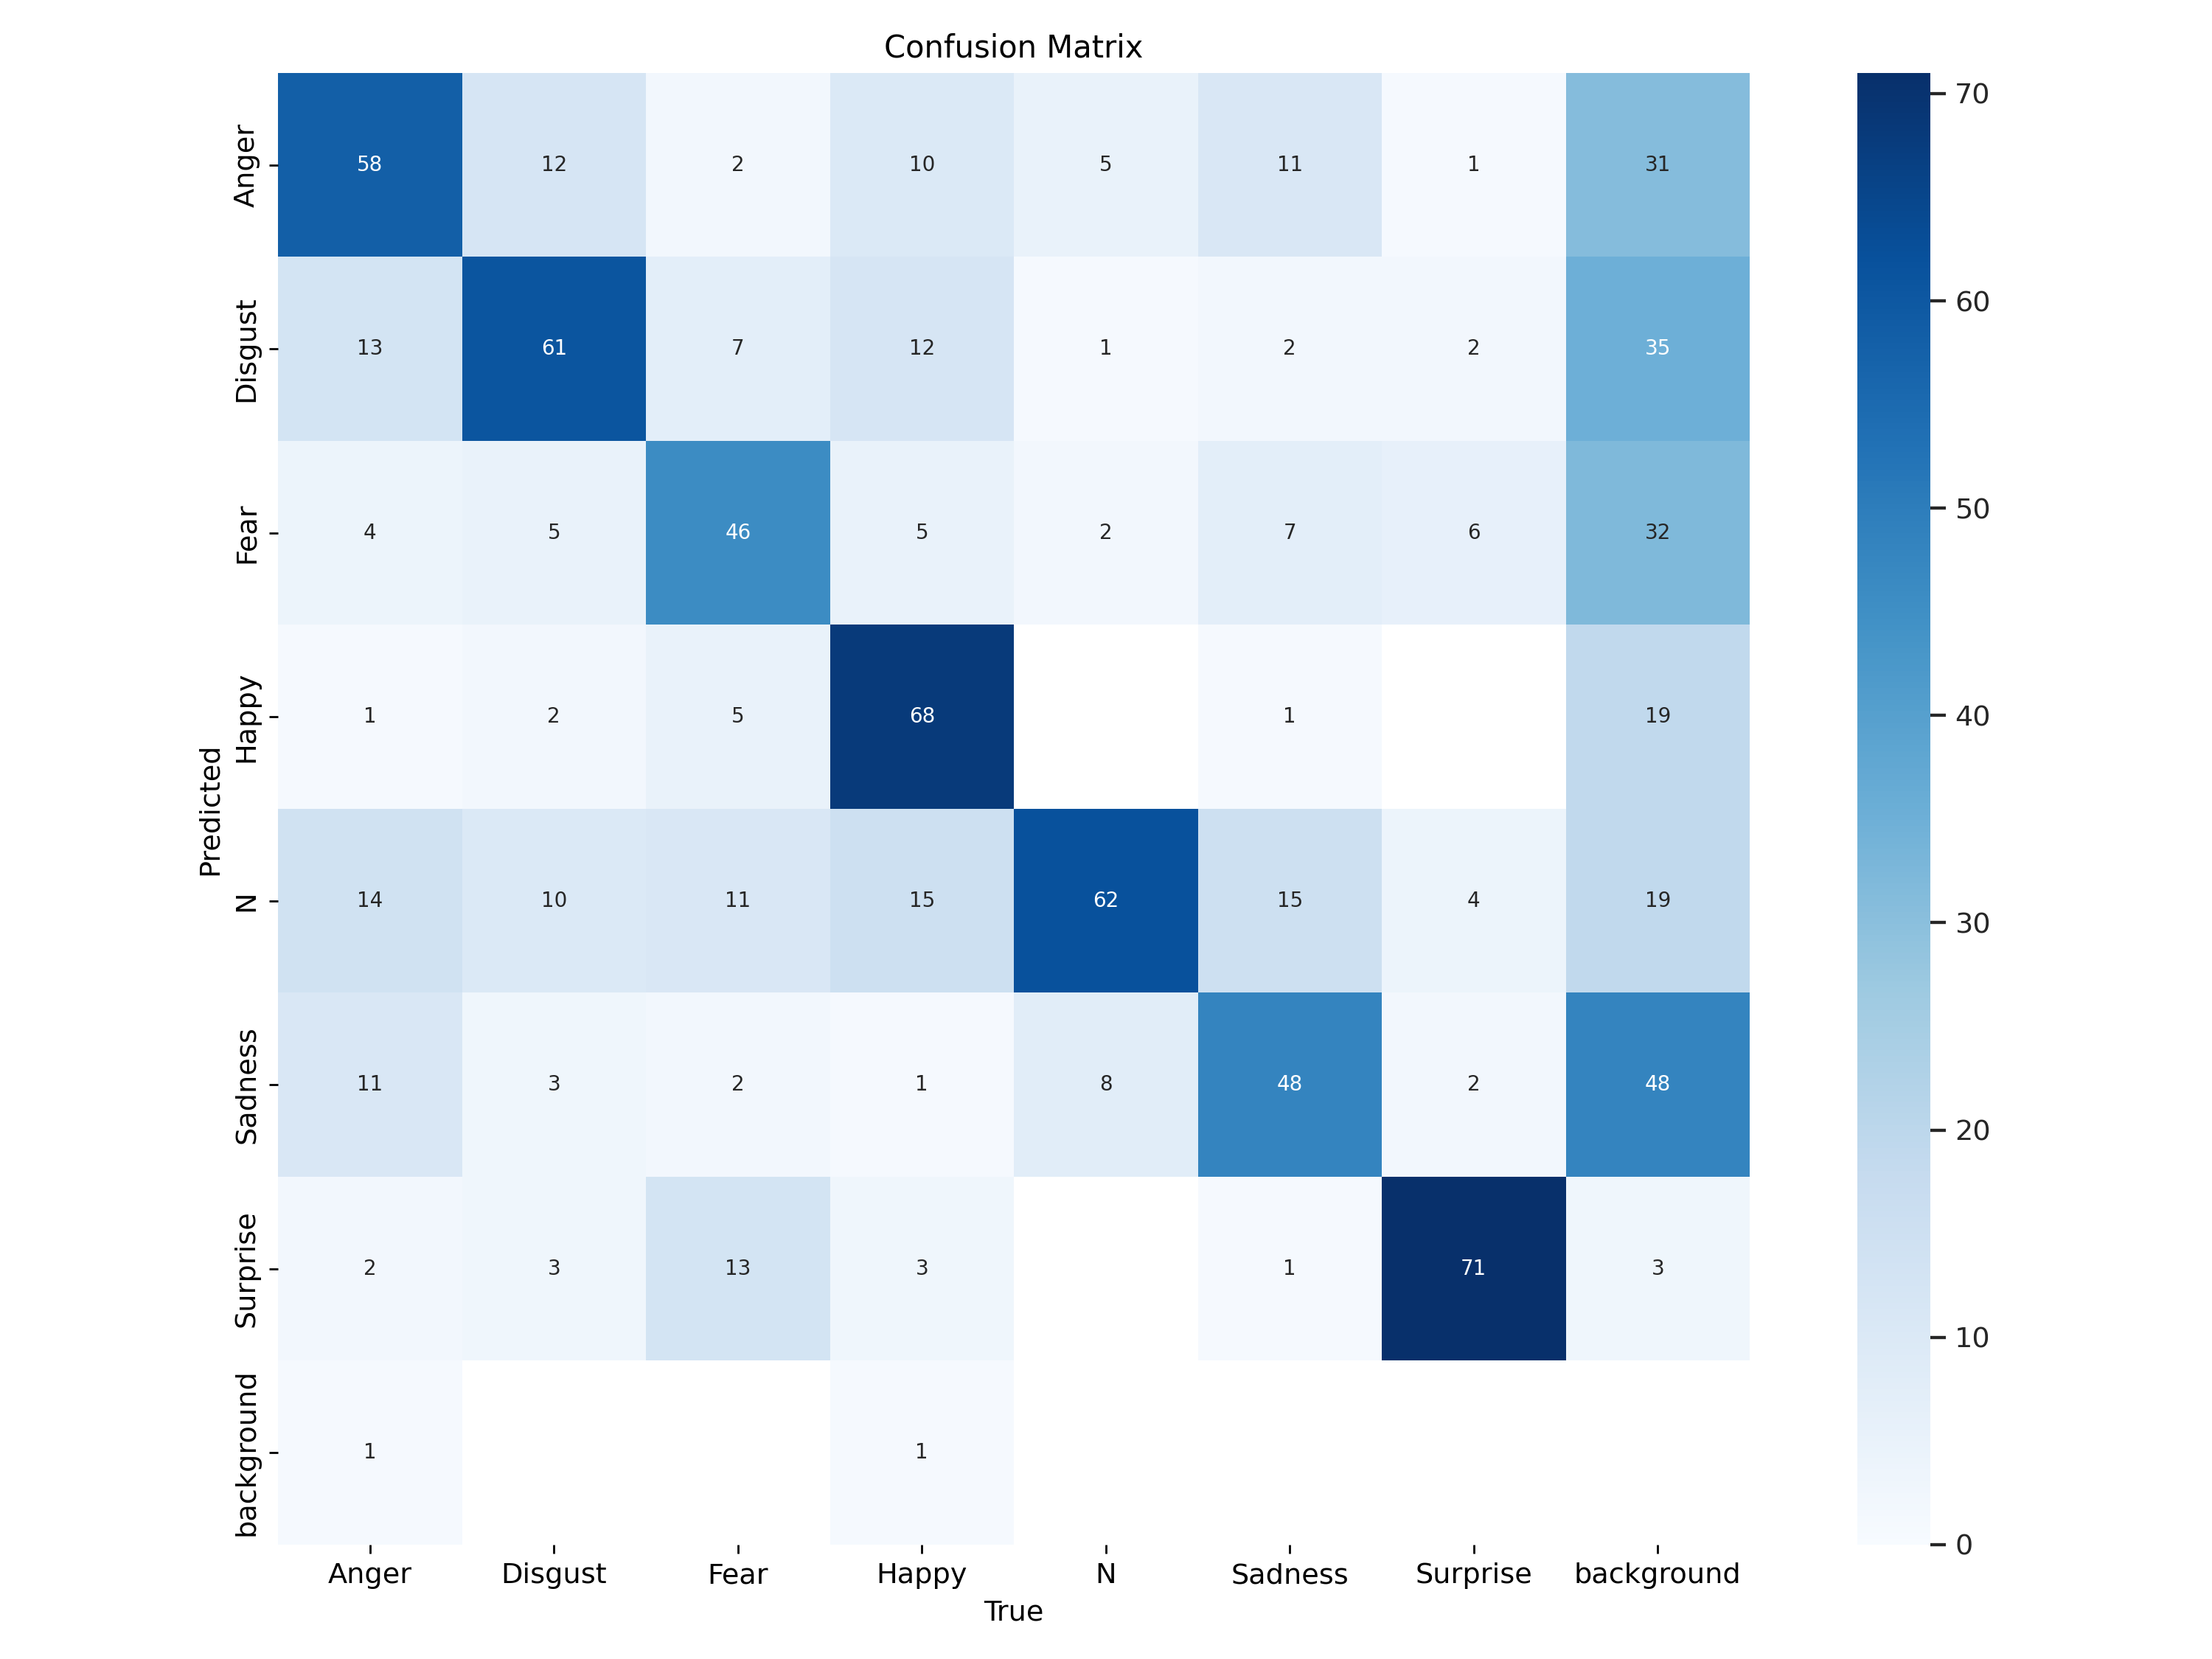

In [2]:
Image(filename=f'./runs/detect/train2/confusion_matrix.png')

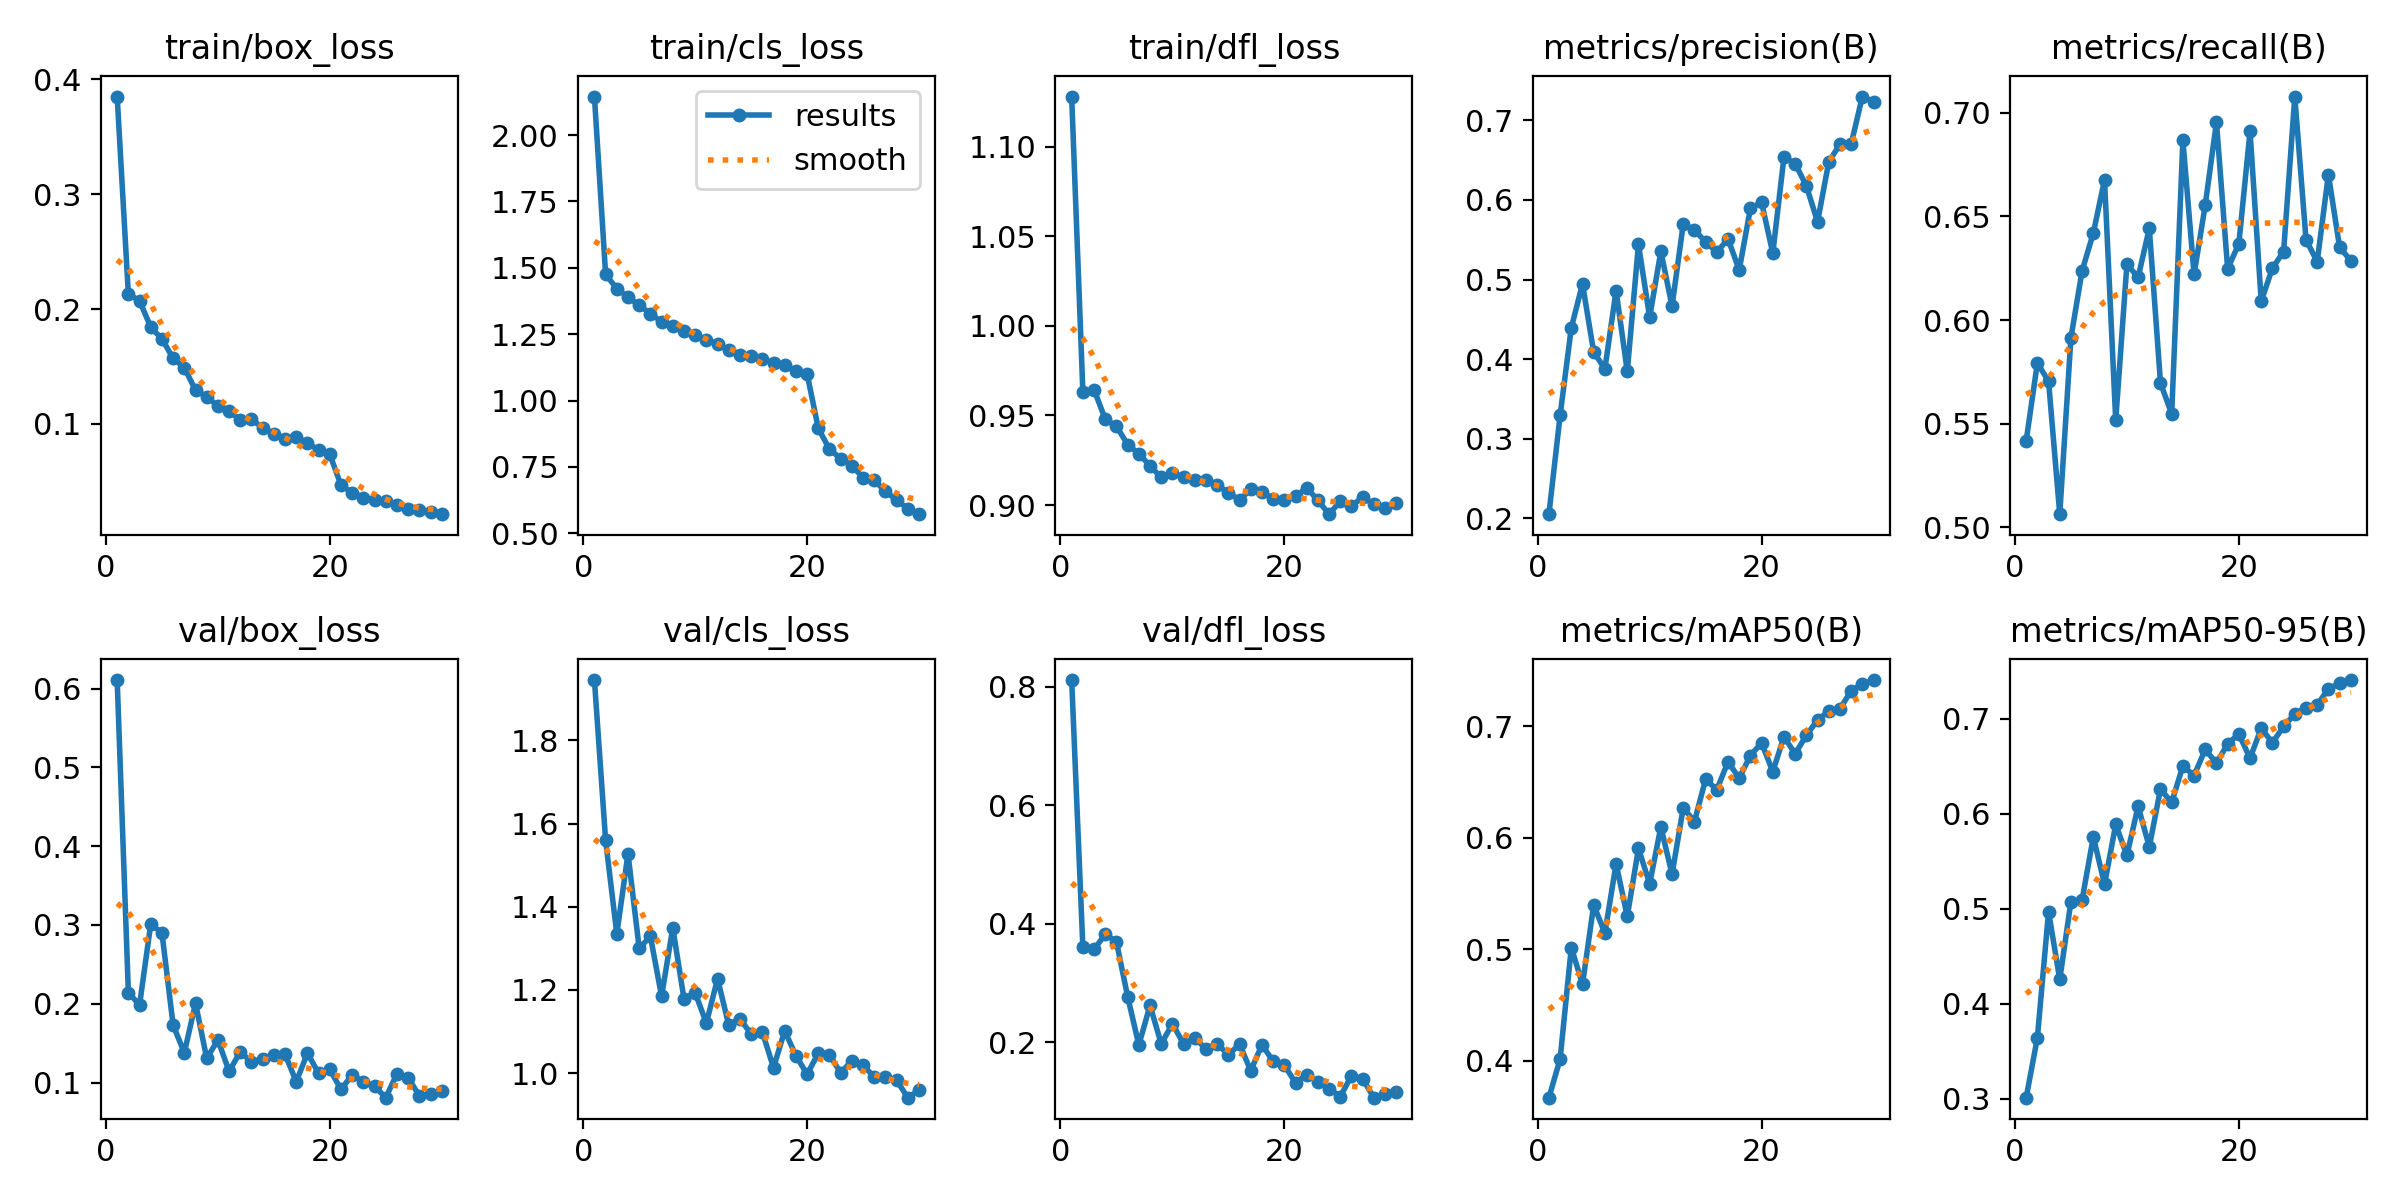

In [3]:
Image(filename=f'./runs/detect/train2/results.png')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
results = pd.read_csv('./runs/detect/train2/results.csv')

In [6]:
results.columns

Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

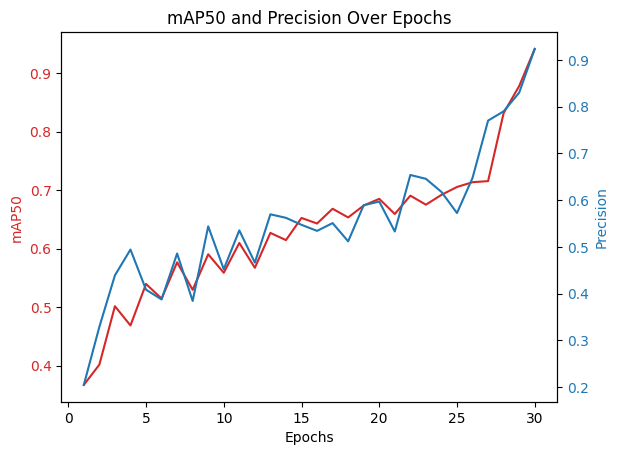

In [7]:
import matplotlib.pyplot as plt

epochs = results['                  epoch']
mAP50_values = results['       metrics/mAP50(B)']
precision_values = results['   metrics/precision(B)']


fig, ax1 = plt.subplots()


color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('mAP50', color=color)
ax1.plot(epochs, mAP50_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Precision', color=color)
ax2.plot(epochs, precision_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.title('mAP50 and Precision Over Epochs')
plt.show()


Live Mood Detection


In [1]:
from ultralytics import YOLO
import cv2

In [2]:
model = YOLO('./runs/detect/train2/weights/best.pt')

In [4]:
model.info()

Model summary: 225 layers, 11138309 parameters, 0 gradients


(225, 11138309, 0, 0.0)

In [5]:

cap = cv2.VideoCapture(0)
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, persist=True)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2.imshow("YOLOv8 Tracking", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break


0: 480x608 1 Anger, 1 Fear, 307.7ms
Speed: 8.3ms preprocess, 307.7ms inference, 1650.6ms postprocess per image at shape (1, 3, 480, 608)

0: 480x608 1 Fear, 292.4ms
Speed: 6.3ms preprocess, 292.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 608)

0: 480x608 1 Fear, 241.1ms
Speed: 4.0ms preprocess, 241.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 608)

0: 480x608 1 Fear, 228.6ms
Speed: 1.8ms preprocess, 228.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 608)

0: 480x608 1 Fear, 288.0ms
Speed: 0.0ms preprocess, 288.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 608)

0: 480x608 1 Fear, 261.3ms
Speed: 2.3ms preprocess, 261.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 608)

0: 480x608 1 Fear, 293.1ms
Speed: 4.0ms preprocess, 293.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 608)

0: 480x608 1 Fear, 267.6ms
Speed: 0.0ms preprocess, 267.6ms inference, 0.0ms postprocess per image at sha

KeyboardInterrupt: 

In [5]:
model.predict(source="0", show=True)


1/1: 0... Success ✅ (inf frames of shape 640x480 at 30.00 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 224x224 surprise 0.36, sad 0.25, neutral 0.12, fear 0.11, happy 0.10, 243.5ms
0: 224x224 surprise 0.33, sad 0.30, fear 0.16, happy 0.09, neutral 0.08, 250.3ms
0: 224x224 sad 0.28, surprise 0.22, fear 0.16, neutral 0.14, happy 0.12, 290.4ms
0: 224x224 sad 0.43, surprise 0.18, neutral 0.14, happy 0.12, fear 0.08, 332.3ms
0: 224x224 sad 0.58, neutral 0.11, surprise 0.11, happy 0.10, fear 0

KeyboardInterrupt: 